The goal is to create unsupervised clusters of mantaray images, to better understand the different mantaray groupings, and this work will supplement our future possibly Phase 2 problem, by forming some type of pseudo labels for the mantaray identification task.

# Loading the data

In [2]:
!cp /content/drive/MyDrive/train2020.zip .

In [3]:
!unzip train2020.zip

Archive:  train2020.zip
  inflating: train2020/000000000001.jpg  
  inflating: train2020/000000000002.jpg  
  inflating: train2020/000000000004.jpg  
  inflating: train2020/000000000006.jpg  
  inflating: train2020/000000000008.jpg  
  inflating: train2020/000000000010.jpg  
  inflating: train2020/000000000011.jpg  
  inflating: train2020/000000000012.jpg  
  inflating: train2020/000000000013.jpg  
  inflating: train2020/000000000014.jpg  
  inflating: train2020/000000000017.jpg  
  inflating: train2020/000000000019.jpg  
  inflating: train2020/000000000020.jpg  
  inflating: train2020/000000000022.jpg  
  inflating: train2020/000000000025.jpg  
  inflating: train2020/000000000026.jpg  
  inflating: train2020/000000000027.jpg  
  inflating: train2020/000000000028.jpg  
  inflating: train2020/000000000029.jpg  
  inflating: train2020/000000000031.jpg  
  inflating: train2020/000000000033.jpg  
  inflating: train2020/000000000034.jpg  
  inflating: train2020/000000000038.jpg  
  inflatin

In [4]:
import os
from PIL import Image
import numpy as np
from tqdm.notebook import tqdm
import psutil

In [5]:
base_dir = os.getcwd()
train_dir = 'train2020'
train_image_path = os.path.join(base_dir, train_dir)

In [6]:
def read_image_into_array(base_path, sample = None, random = False):

  file_list = os.listdir(base_path)
  result_image_list = []
  cpu = 0

  if sample:
    if random:
      file_list = np.random.choice(file_list, size=sample, replace=False)
    else:
      file_list = file_list[:sample]

  for i in tqdm(file_list):
    file_name = os.path.join(base_path, i)

    try:
      read_image = Image.open(file_name)

      resized_image = np.asarray(read_image.convert('RGB').resize((256, 256), Image.ANTIALIAS))
      
      result_image_list.append(resized_image)

      cpu+=1


    except IOError:
      print(f'Problem opening file {i}')

    if cpu % 700 == 0:
      print(f'{psutil.virtual_memory().available * 100 / psutil.virtual_memory().total} RAM available.')

  return np.array(result_image_list)


In [7]:
data = read_image_into_array(train_image_path, 2000, True)

  0%|          | 0/2000 [00:00<?, ?it/s]

89.45100774867473 RAM available.
90.51486440570942 RAM available.


# Preprocess the data

In [8]:
data = np.float32(data)
data = data/255.0
data = data.reshape(len(data),-1)

In [9]:
data.shape

(2000, 196608)

In [ ]:


kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(data)
kmeans.cluster_centers_.shape

(10, 196608)

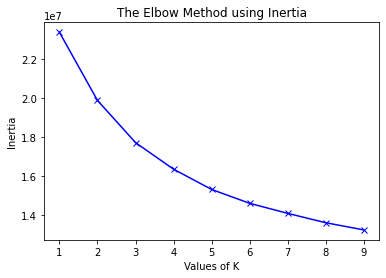

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []

K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(data)
    
    inertias.append(kmeanModel.inertia_)



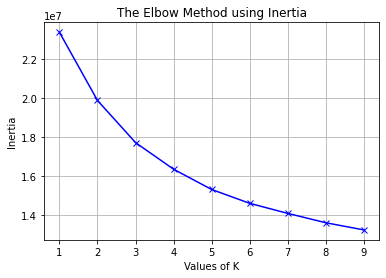

In [13]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.grid()
plt.show()

# Visualizing the cluster centers

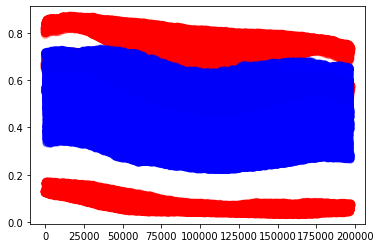

In [ ]:
import matplotlib.pyplot as plt

x_data = [i for i in range(196608)]
plt.scatter(x_data,kmeans.cluster_centers_[0], color = 'red',alpha=0.2,s=70)
plt.scatter(x_data,kmeans.cluster_centers_[1] , color = 'blue',alpha=0.2,s=50)

# Cluster output

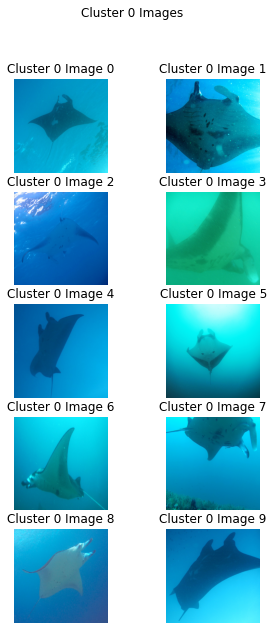

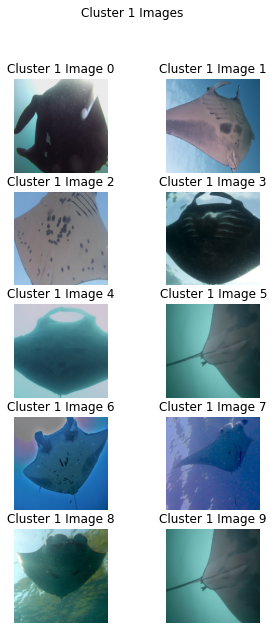

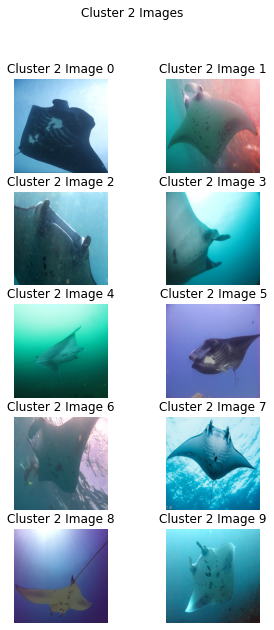

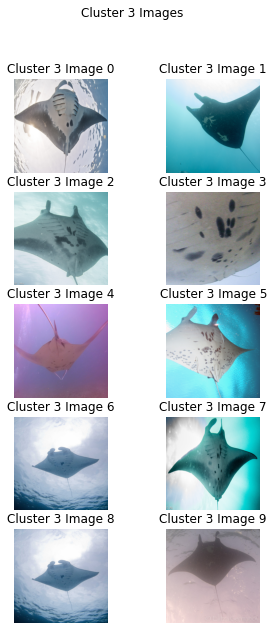

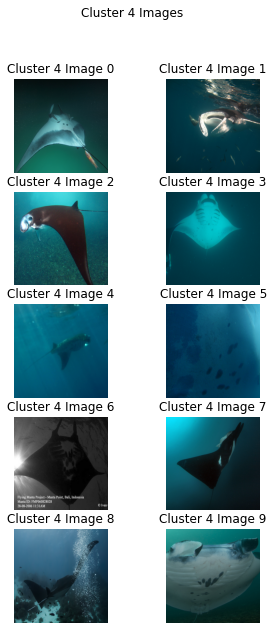

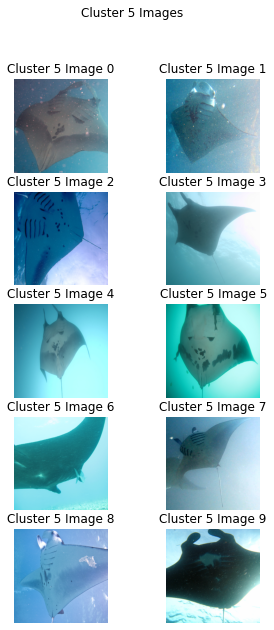

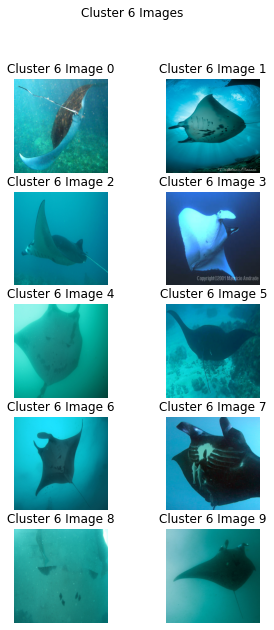

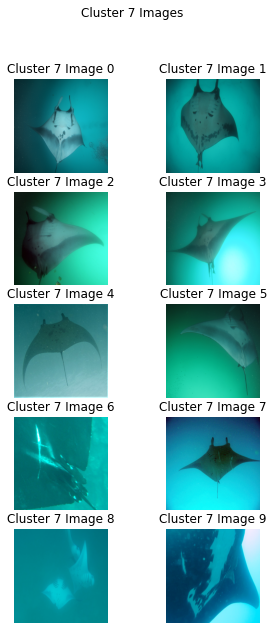

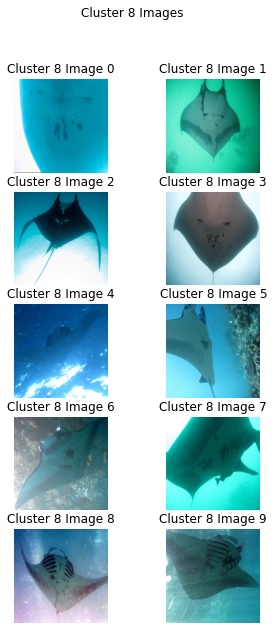

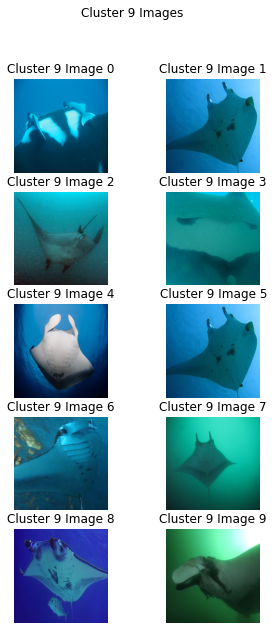

In [ ]:
# Create a grid
sample_size = 10
row = 5
col = sample_size // 5


for i in range(kmeans.n_clusters):
  c = 0
  figure, axes_grid = plt.subplots(row, col, figsize = (row*1, col*5))
  figure.suptitle(f"Cluster {i} Images")
  for ax in axes_grid:
    for j in ax:
      j.axis('off')
      # choose a random image

      cluster_img = np.random.choice(np.where(clusters == i)[0], replace=False)
      img = data[cluster_img].reshape(256,256,3) * 255
      
      j.imshow(Image.fromarray(img.astype(np.uint8)))
      j.set_title(f'Cluster {i} Image {c}')

      c+=1

# Resnet + Kmeans

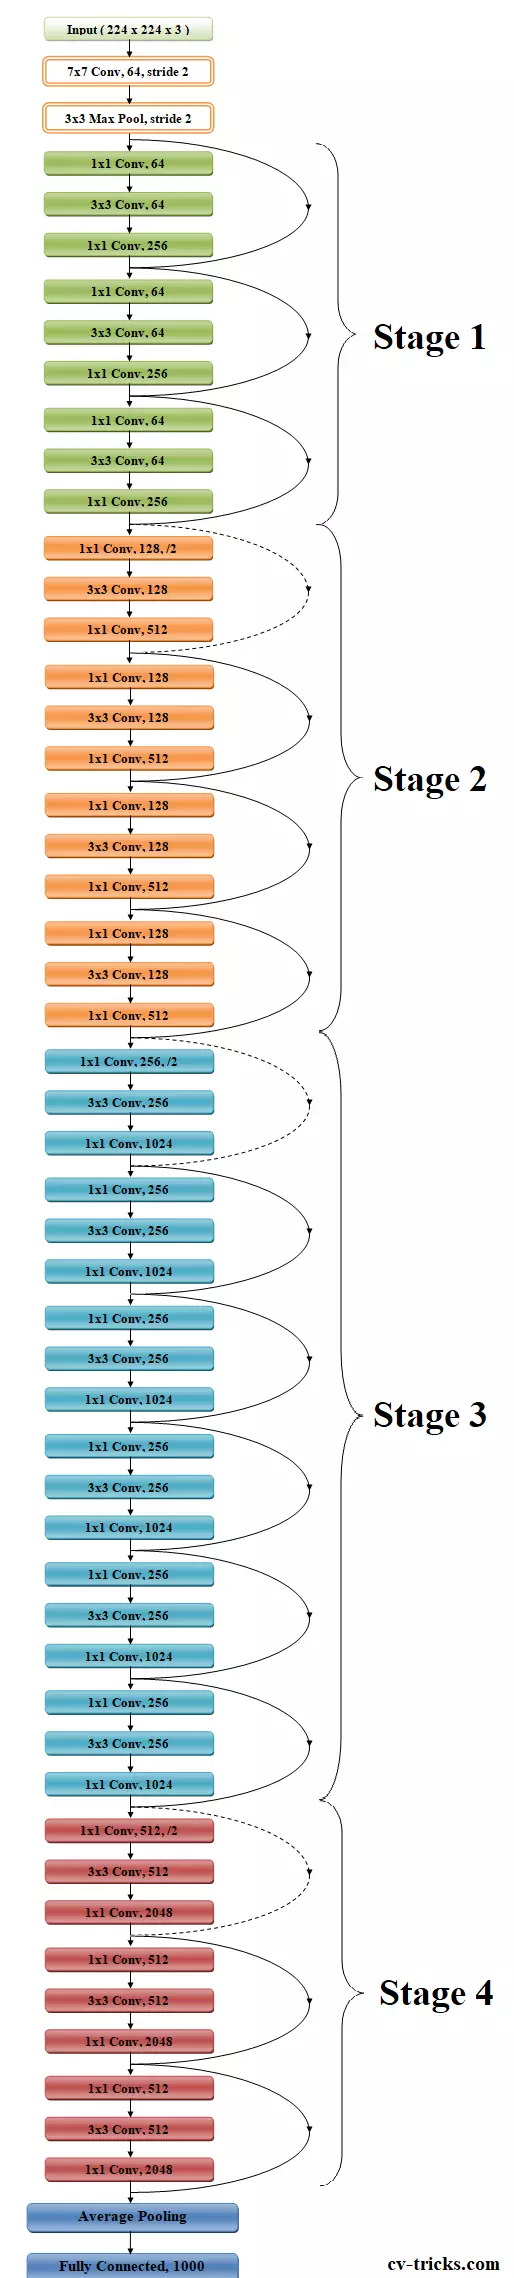

In [ ]:
import tensorflow as tf

model =   tf.keras.applications.resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256,3))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_feature_list = []

for im in tqdm(data):

    im = im.reshape(256,256,3)

    img = tf.keras.applications.resnet.preprocess_input(np.expand_dims(im.copy(), axis=0))

    resnet_feature = model.predict(img)

    resnet_feature_np = np.array(resnet_feature)

    resnet_feature_list.append(resnet_feature_np.flatten())

  0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
array_df = np.array(resnet_feature_list)

In [ ]:
array_df.shape

(2000, 131072)

In [ ]:
del resnet_feature_list

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(array_df)

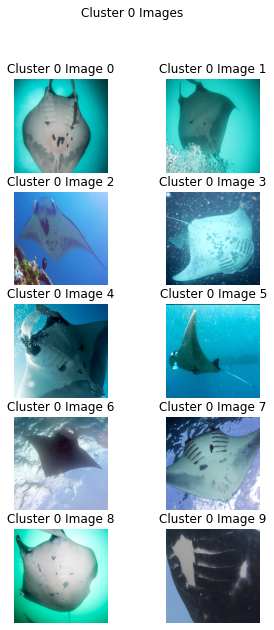

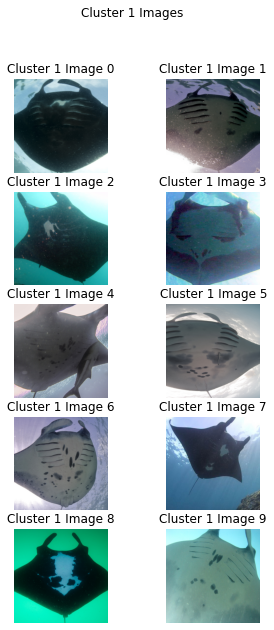

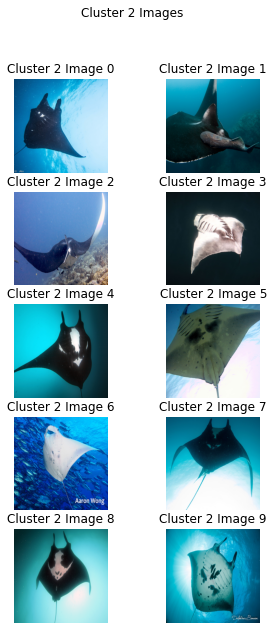

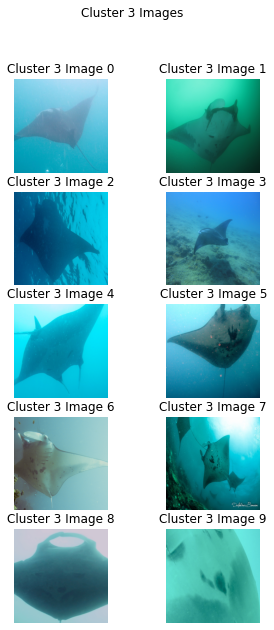

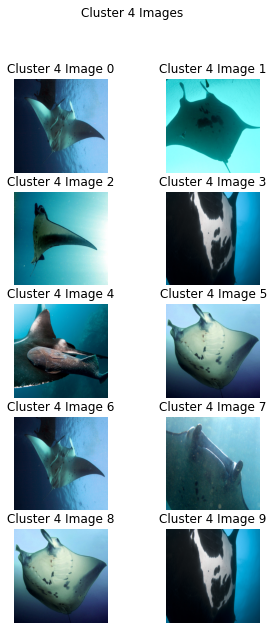

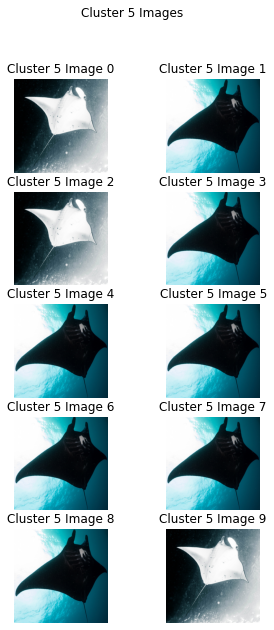

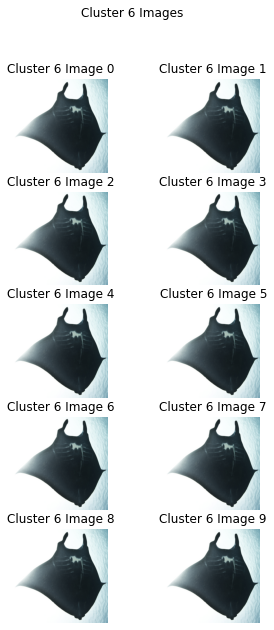

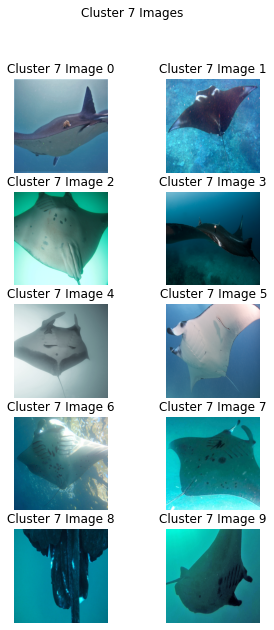

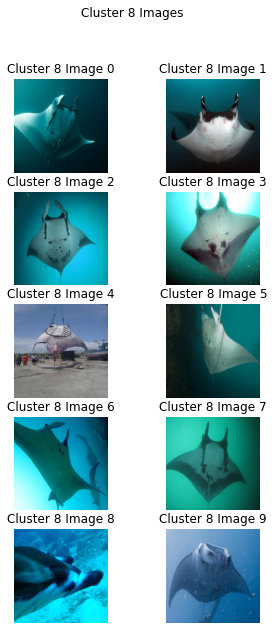

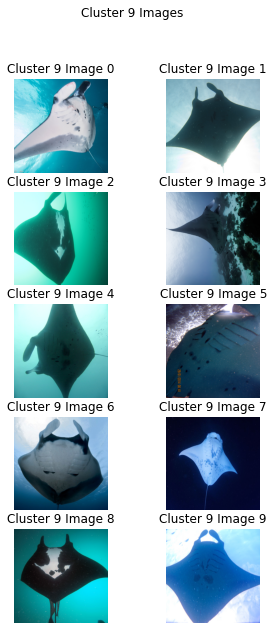

In [ ]:
# Create a grid
sample_size = 10
row = 5
col = sample_size // 5


for i in range(kmeans.n_clusters):
  c = 0
  cluster_img = np.random.choice(np.where(clusters == i)[0], sample_size, replace=False)
  row = 5
  col = sample_size // 5
  figure, axes_grid = plt.subplots(row, col, figsize = (row*1, col*5))
  figure.suptitle(f"Cluster {i} Images")
  for ax in axes_grid:
    for j in ax:
      j.axis('off')
      # choose a random image

      cluster_sample_img = np.random.choice(np.where(clusters == i)[0], replace=False)
      img = data[cluster_img].reshape(256,256,3) * 255
      
      j.imshow(Image.fromarray(img.astype(np.uint8)))
      j.set_title(f'Cluster {i} Image {c}')

      c+=1

# To-Do
- ~~Use elbow method to find the best k value.~~